# Machine Learning 101
In this notebook, we'll go through a few examples that show you the process of training and testing a machine learning model.

This notebook was created by Jordan Wirfs-Brock for CS215, and adapts some materials from LearnPythonWithRune's [Machine Learning With Python](https://github.com/LearnPythonWithRune/MachineLearningWithPython/blob/main/jupyter/final/01%20-%20Lesson%20-%20Linear%20Classifier.ipynb) series as well as Soham Medewar's ["Visualizing Decision Boundary (Perceptron)"](https://www.codingninjas.com/codestudio/library/visualizing-decision-boundary-perceptron) post.

### Making a Cat/Dog Classifier with Linear Perceptron

In [51]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# These are from scikitlearn, a really popular machine learning library
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron

In [52]:
# Import the data and example
df = pd.read_csv('cats-dogs.csv')
df.head()

,Species,Length (in),Weight (lbs),Unnamed: 3
0,cat,15,8,NaN
1,dog,37,52,NaN
2,dog,28,44,NaN
3,cat,11,6,NaN
4,cat,14,9,NaN


In [64]:
# Drop any missing values, only select the columns we want
dataset = df[['Species','Length (in)', 'Weight (lbs)']].dropna()

In [54]:
# Split into X, the inputs and y, the outputs (labels)
X = dataset[['Length (in)', 'Weight (lbs)']] # Select the X values (the inputs/observations)
y = dataset['Species'] # Select the Y values (the outputs/labels)

In [55]:
# Convert the species labels (y) into 0 for cat and 1 for dog
y = np.array([0 if value == 'cat' else 1 for value in y])

In [56]:
# Split into testing and training data
# We will use the training data to fit our model
# Then we will use the testing data to see how well it predicts the species
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [57]:
# Create our classifier, called clf, using a "Perceptron"
# More about perceptrons: https://en.wikipedia.org/wiki/Perceptron
clf = Perceptron(random_state=0)

# Fit the model to the training data
clf.fit(X_train, y_train)

# Predict the values of the testing data
y_pred = clf.predict(X_test)

# Compute the accuracy score (does the predicted value the actual value?)
accuracy_score(y_test, y_pred)

0.8888888888888888

Pretty good! We predicted right 88.9% of the time!

/Users/wirfsbrj/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


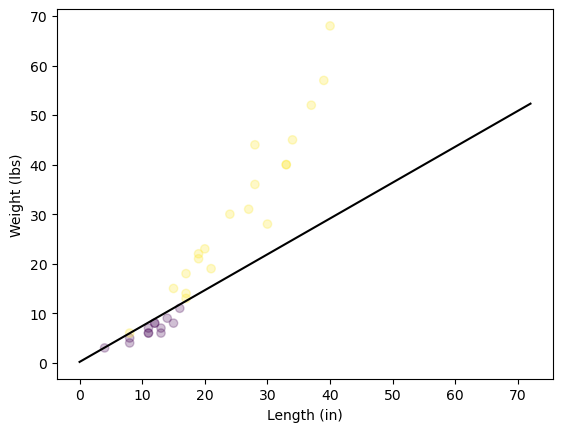

In [58]:
# Now let's plot it:

# First the data, colored by dog/cat:
fig, ax = plt.subplots()
X_data = X.to_numpy()
y_all = clf.predict(X_data)
ax.scatter(x=X_data[:,0], y=X_data[:,1], c=y_all, alpha=.25)

# Next the decision boundary, which is a line
ymin, ymax = 0,72
w = clf.coef_[0]
# Calculate the slope based on the weights of the model
a = -w[0] / w[1]
xx = np.linspace(ymin, ymax)
yy = a * xx - (clf.intercept_[0]) / w[1]
plt.plot(xx, yy, 'k-')
ax.set_xlabel('Length (in)')
ax.set_ylabel('Weight (lbs)')
plt.show()


In [59]:
X_test

,Length (in),Weight (lbs)
11,8,4
20,8,6
24,17,18
17,33,40
2,28,44
25,24,30
26,30,28
16,17,13
10,4,3


In [60]:
# Look at the **predicted** values
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 0])

In [61]:
# Look at the actual values
y_test

array([0, 1, 1, 1, 1, 1, 1, 0, 0])

In [63]:
# We can also look at the "weights" (the coefficients of the line)
clf.coef_

array([[-21.,  29.]])